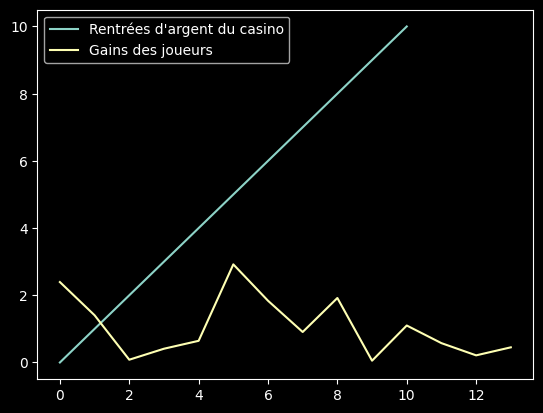

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Définir le paramètre alpha et la durée de simulation
alpha = 1
duration = 10

# Générer la série de temps de saut (ξk)
jump_times = np.random.exponential(size=1000)

# Calculer les instants de saut (T_i)
T = [0]
for i in range(1, len(jump_times)+1):
    T.append(T[i-1] + jump_times[i-1])

# Générer la série de gains des joueurs (Xi)
gains = np.random.exponential(size=1000)

# Calculer les rentrées d'argent du casino et les gains des joueurs en fonction du temps
casino_earnings = [alpha*t for t in range(duration+1)]
player_earnings = [gains[i] for i in range(len(T)) if T[i] <= duration]

# Tracer les rentrées d'argent du casino et les gains des joueurs en fonction du temps
plt.plot(casino_earnings, label='Rentrées d\'argent du casino')
plt.plot(player_earnings, label='Gains des joueurs')
plt.legend()
plt.show()

In [3]:
import matplotlib.pyplot as plt
import numpy as np

"""
Fonction qui simule le fonctionnement d'un casino selon le modèle de Poisson
et qui trace l'évolution du capital du casino au fil du temps.

Paramètres
alpha : Paramètre alpha des rentrées d'argent
Y0 : Capital initial du casino
duration : Durée de la simulation (en nombre de pas de temps)
"""
def casino_simulation(alpha, Y0, duration, earn_function):
    plt.figure(figsize=(10, 5))

    # Génére la série de temps de saut (ξk) selon une loi exponentielle de paramètre 1
    jump_times = np.random.exponential(size=duration, scale=1)

    # Calculer les instants de saut (Ti)
    T = np.cumsum(jump_times)
    T = np.insert(T, 0, 0)

    # Générer la série de gains des joueurs (Xi) selon une loi exponentielle de paramètre 1
    gains = earn_function(duration)

    # Calculer le nombre de joueurs ayant eu un gain avant chaque instant de temps t
    N_t = np.zeros(duration+1, dtype=int)
    for t in range(1, duration+1):
        #N_t[t] = np.max( [i for i in range(duration+1) if T[i] <= t] )
        N_t[t] = np.argmax(np.where(T <= t))

    # Calculer les rentrées d'argent du casino
    casino_earnings = alpha * np.arange(duration+1)

    # Compute player earnings
    player_earnings = np.zeros(duration+1)
    for t in range(1, duration+1):
        player_earnings[t] = np.sum(gains[:N_t[t]])

    # Calculer le capital du casino à chaque instant de temps t
    casino_capital = Y0 + casino_earnings - player_earnings

    plt.plot(casino_earnings, label='Rentrées d\'argent du casino')
    plt.plot(player_earnings, label='Gains des joueurs')
    plt.plot(casino_capital, label='Capital du casino')

    plt.title(r'Simulation casino - $\alpha = {}, Y_0 = {}, T = {}$'.format(alpha, Y0, duration))
    plt.legend()

    return casino_capital

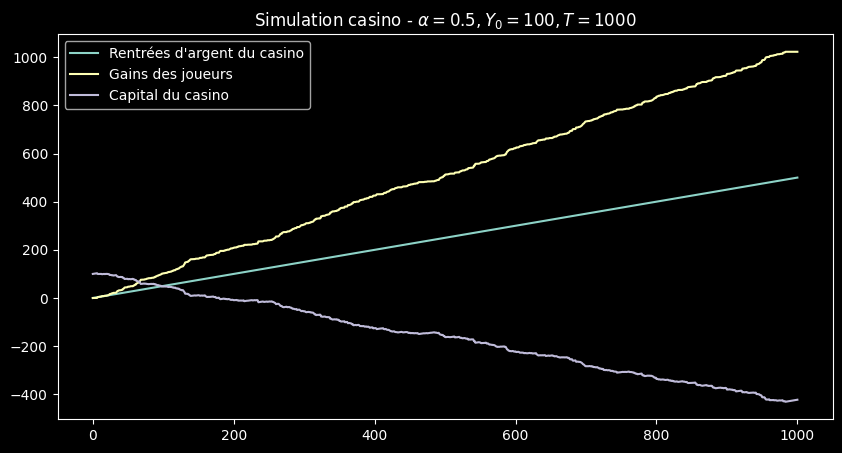

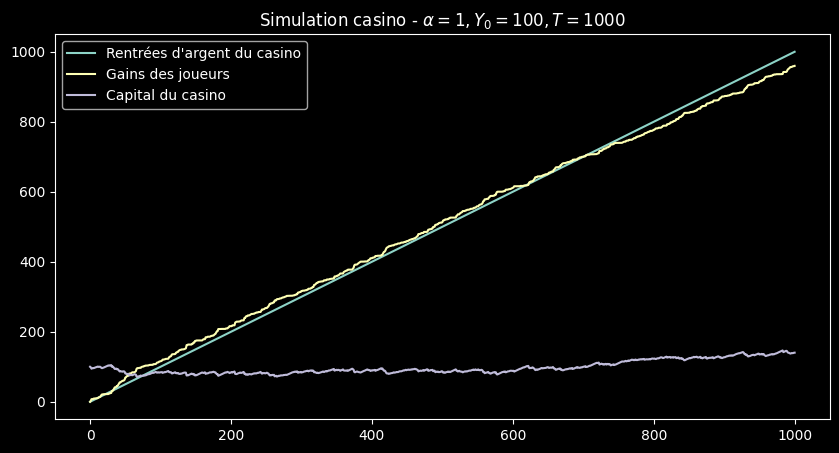

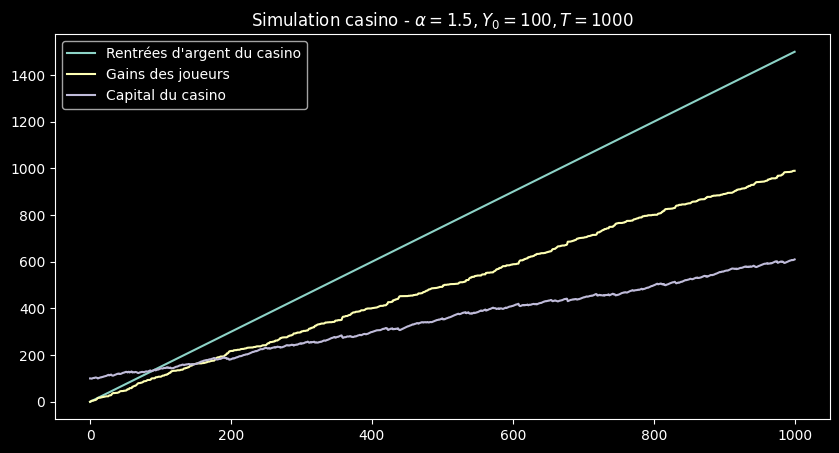

In [4]:
def earnings_function(n):
    return np.random.exponential(size=n)

casino_simulation(0.5, 100, 1000, earnings_function)
casino_simulation(1, 100, 1000, earnings_function)
casino_simulation(1.5, 100, 1000, earnings_function);

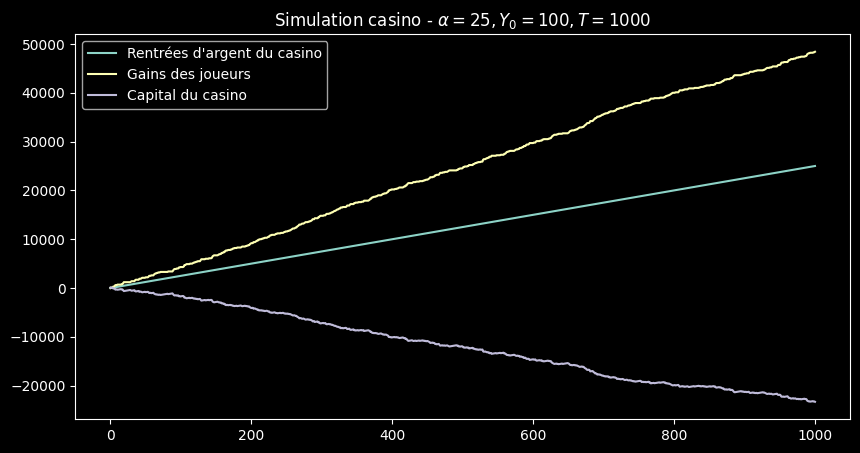

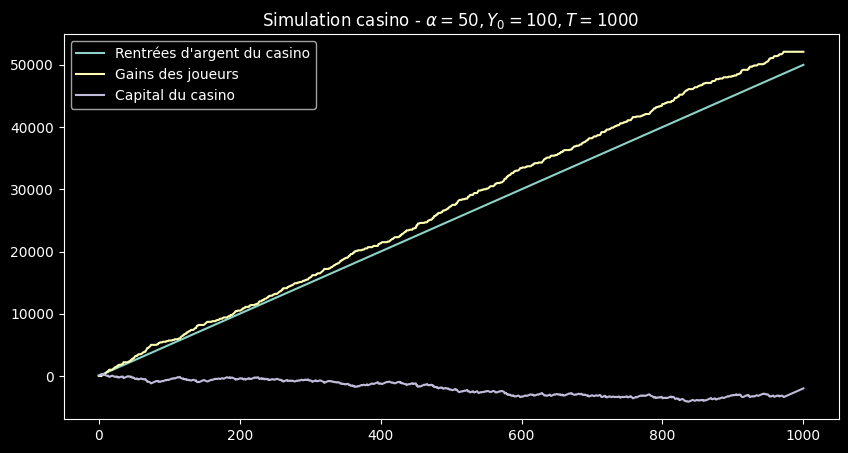

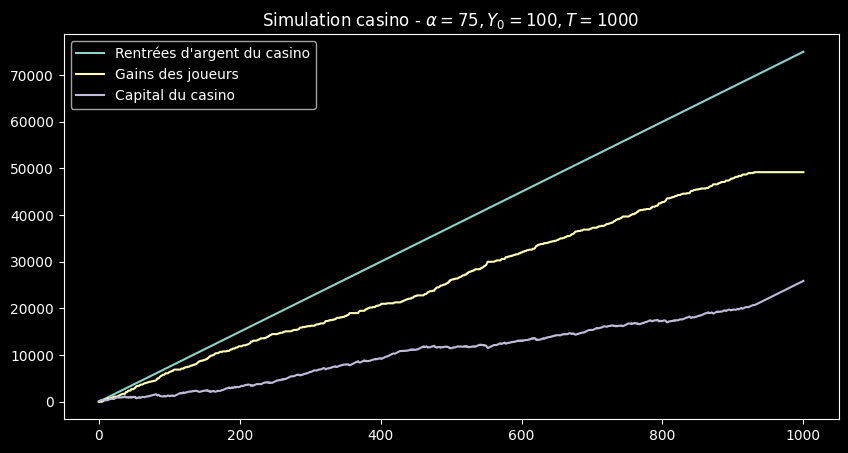

In [5]:
def simgain(n):
    u = np.random.rand(n)
    return (u < 0.5) * 0 + (u >= 0.5) * 100

casino_simulation(25, 100, 1000, simgain)
casino_simulation(50, 100, 1000, simgain)
casino_simulation(75, 100, 1000, simgain);

alpha =  1
Y0 =  100
duration =  1000
0


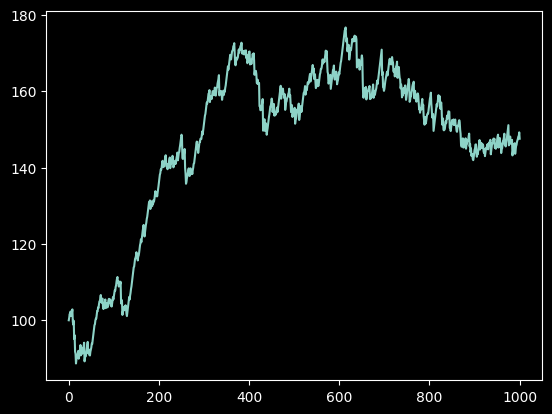

In [25]:
import casino as c

def earnings_function(n):
    return np.random.exponential(size=n)

capital = c.casino_simulation(1, 100, 1000, earnings_function)[2];
plt.plot(capital)